<a href="https://colab.research.google.com/github/Fahma-n/Deep-Learning/blob/main/CNN_Corals_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [ ]:
import os
import cv2

In [ ]:
Encoder=OneHotEncoder()
Encoder.fit([["Bleached"],["Healthy"]])

OneHotEncoder()

In [ ]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk("/content/drive/MyDrive/corals/bleached_corals"):
  for file in f:
    if ".jpg" in file:
      paths.append(os.path.join(r,file))
  for path in paths:
    Img=Image.open(path)
    Img=Img.resize((128,128))
    Img=np.array(Img)
    if (Img.shape==(128,128,3)):
      data.append(np.array(Img))
      result.append(Encoder.transform([["Bleached"]]).toarray())




In [ ]:
paths=[]
for r,d,f in os.walk("/content/drive/MyDrive/corals/healthy_corals"):
  for file in f:
    if ".jpg" in file:
      paths.append(os.path.join(r,file))
  for path in paths:
    Img=Image.open(path)
    Img=Img.resize((128,128))
    Img=np.array(Img)
    if (Img.shape==(128,128,3)):
      data.append(np.array(Img))
      result.append(Encoder.transform([["Healthy"]]).toarray())




In [ ]:
data=np.array(data)
data.shape

(931, 128, 128, 3)

In [ ]:
result=np.array(result)
result=result.reshape(931,2)

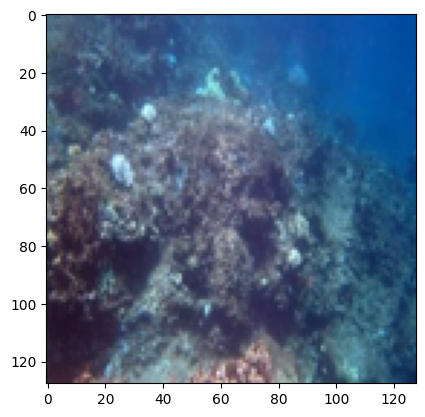

In [ ]:
plt.imshow(data[5])

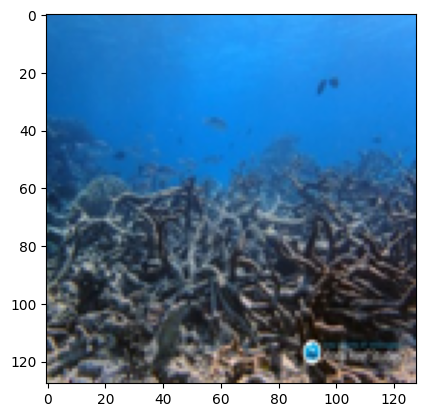

In [ ]:
plt.imshow(data[437])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding="same"))
model.add(Conv2D(32,(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,Activation("softmax")))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_23 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_11 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
xtrain.shape

(744, 128, 128, 3)

In [ ]:
ytrain.shape

(744, 2)

In [ ]:
history=model.fit(xtrain,ytrain,epochs=5,batch_size=64,verbose=1,validation_data=(xtest,ytest))

Epoch 1/5
12/12 [==============================] - 66s 5s/step - loss: 2.1166 - accuracy: 0.5914 - val_loss: 0.7401 - val_accuracy: 0.5080
Epoch 2/5
12/12 [==============================] - 62s 5s/step - loss: 0.7622 - accuracy: 0.6492 - val_loss: 0.6412 - val_accuracy: 0.6738
Epoch 3/5
12/12 [==============================] - 61s 5s/step - loss: 0.6105 - accuracy: 0.6922 - val_loss: 0.6468 - val_accuracy: 0.6471
Epoch 4/5
12/12 [==============================] - 62s 5s/step - loss: 0.5623 - accuracy: 0.7379 - val_loss: 0.6380 - val_accuracy: 0.6684
Epoch 5/5
12/12 [==============================] - 61s 5s/step - loss: 0.5197 - accuracy: 0.7473 - val_loss: 0.6955 - val_accuracy: 0.6417


In [ ]:
loss,accuracy=model.evaluate(xtest,ytest,batch_size=64)

3/3 [==============================] - 5s 2s/step - loss: 0.6955 - accuracy: 0.6417


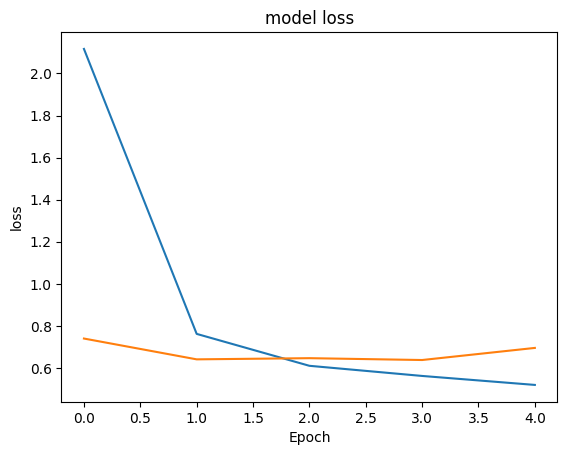

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
def name(s):
  if s==0:
    return "Bleached"
  else:
    return "Healthy"


it is Bleached


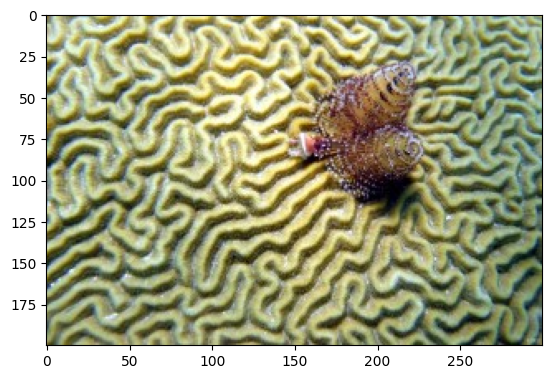

In [ ]:
img=Image.open("/content/drive/MyDrive/corals/bleached_corals/11531111734_db61a343f5_o.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
#classification = classification.astype(int)
print("it is "  + name(classification))

In [ ]:
#def name1(s):
  #if s==0:
    #return "Bleached"
  #else:
    #return "Healthy"

94.84629034996033% this is a Bleached


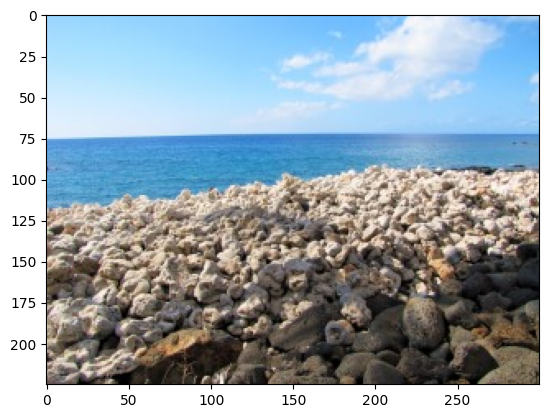

In [ ]:
img=Image.open("/content/drive/MyDrive/corals/bleached_corals/11263772193_b910d0037b_o.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
#classification = classification.astype(int)
print(str(res[0][classification] * 100) + "% this is a " + name1(classification))